In [293]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Import Libraries</h2>

In [294]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, LSTM, Dropout
from keras.optimizers import Adam
from keras import regularizers
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("punkt")
tf.test.gpu_device_name()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'/device:GPU:0'


<h2>Load and Check Data </h2>

In [295]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [296]:
#browsing the data
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [297]:
# Size of our data.
data.shape

(50000, 2)

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [299]:
# statistical summary of our data
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


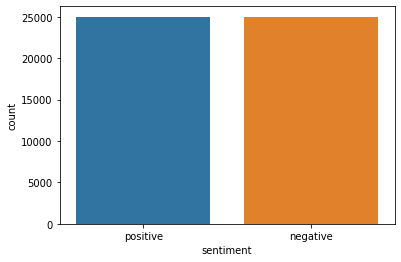

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [300]:
sns.countplot(data['sentiment'])
plt.show()
print(data.sentiment.value_counts())

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > We see that the number of positive and negative comments is equal. </p> </li>
</ul>

In [301]:
data.sentiment=[1 if sentiment=='positive' else 0 for sentiment in data.sentiment]

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > We convert our sentiment property to int values. </p> </li>
        <li  style = "color:green" > <p style = "color:black;font-weight:bold" > positive --> 1 </p> </li>
        <li  style = "color:red" > <p style = "color:black;font-weight:bold" > negative --> 0 </p> </li>
</ul>

In [302]:
print(data.sentiment.value_counts())

1    25000
0    25000
Name: sentiment, dtype: int64


<a id ='2' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Ineffective Words </h2>

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > Let's first take a look at the ineffective English words. </p> </li>
</ul>

In [303]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [304]:
WPT= nltk.WordPunctTokenizer()
stop_words_list=nltk.corpus.stopwords.words('english')

In [305]:
print(stop_words_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<a id ='3' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0">Clearing data </h2>

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > process of clearing punctuation marks in data. </p> </li>
     <li  style = "color:green" > <p style = "color:black;font-weight:bold" > cleaning unnecessary marks in data. </p> </li>
        <li  style = "color:red" > <p style = "color:black;font-weight:bold" > capitalization to lowercase. </p> </li>
     <li  style = "color:green" > <p style = "color:black;font-weight:bold" > cleaning extra spaces. </p> </li>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > removal of stopwords in sentences. </p> </li>
</ul>

In [306]:
data['review'] = data['review'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
data['review'] = data['review'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

data['review'] = data['review'].apply(lambda x: x.lower())

data['review'] = data['review'].apply(lambda x: x.strip())

In [307]:
data.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the ...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is a...,1
5,probably my all time favorite movie a story of...,1
6,i sure would like to see a resurrection of a u...,1
7,this show was an amazing fresh innovative id...,0
8,encouraged by the positive comments about this...,0
9,if you like original gut wrenching laughter yo...,1


In [308]:
"""
I closed the stopword process because it took a long time.
If you want, you can try opening the codes in the comment line.
"""
# def token(values):
#    words = nltk.tokenize.word_tokenize(values)
#    filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
#    not_stopword_doc = " ".join(filtered_words)
#    return not_stopword_doc
# data['review'] = data['review'].apply(lambda x: token(x))

'\nI closed the stopword process because it took a long time.\nIf you want, you can try opening the codes in the comment line.\n'

<a id ='4' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Train - Test Split </h2>

In [309]:
sentiment=data.sentiment.values
sentiment

array([1, 1, 1, ..., 0, 0, 0])

In [310]:
data=data['review']

In [311]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(data,sentiment,test_size=0.2)

In [312]:
print('Train set size:',x_train.shape)
print('Test set size:', x_test.shape)

Train set size: (40000,)
Test set size: (10000,)


<a id ='5' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Creating a Dictionary </h2>

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > We create a dictionary of 15000 most used words in English for later use. </p> </li>
</ul>

In [313]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer= Tokenizer(num_words=15000)
tokenizer.fit_on_texts(data)

In [314]:
print(tokenizer.word_index)

Output hidden; open in https://colab.research.google.com to view.

<a id ='6' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Bring the comments to the same size </h2>

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > comments of different lengths cannot train the model. That's why we need to make the sentences the same size. </p> </li>
</ul>

In [315]:
x_train_token= tokenizer.texts_to_sequences(x_train)
x_test_token= tokenizer.texts_to_sequences(x_test)

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" >We replace the words in our sentences with whichever index they are included in the dictionary we have created above. </p> </li>
</ul>

In [316]:
#Then we take the word count of each of our sentences in our data and create a list.
num_tokens=[len(num) for num in x_train_token+x_test_token]
num_tokens=np.array(num_tokens)

In [317]:
num_tokens

array([206, 202, 217, ..., 297,  72, 182])

In [318]:
#Here, when setting the number of tokens, a number is determined by taking into account the variability around the average.
max_tokens=np.mean(num_tokens)+2*np.std(num_tokens)
max_tokens=int(max_tokens)
max_tokens

567

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > max_tokens : This value will allow us to reduce the distribution of sentences in our data and the sentences with opposite lengths, if any, to the average. </p> </li>
</ul>

In [319]:
#It is checked what percentage of the data this determined number covers.
np.sum(num_tokens<max_tokens)/len(num_tokens)

0.94524

In [320]:
#data is adjusted according to the number of tokens specified
x_train_pad = pad_sequences(x_train_token, maxlen=max_tokens)
x_test_pad = pad_sequences(x_test_token, maxlen=max_tokens)

In [321]:
x_train_pad.shape

(40000, 567)

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > As you can see, we have set it to shape 567. So max_tokens
 </p> </li>
</ul>

In [322]:
idx=tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))
print(inverse_map)

Output hidden; open in https://colab.research.google.com to view.

In [323]:
def return_to_sentence(tokens):
  words= [inverse_map[token] for token in tokens if token!=0]
  text=' '.join(words)
  return text

<ul>
    <li  style = "color:red" > <p style = "color:black;font-weight:bold" > We write a function to revert the sentences that we have made int.
 </p> </li>
</ul>

In [324]:
#normal comment
print(return_to_sentence(x_train_pad[215]))

the godfather part i was a stunning look inside the fictional corleone family and how an innocent young man was all but forced into circumstances he never wanted to have a part of the godfather part ii shows that young man s acceptance of his new role his of character as well as his complete loss of all innocence as he dives deeper and deeper into a life of crime the first two parts of this saga of this transformation of michael corleone make for one of the greatest tragedies in cinematic history br br then along came the godfather part iii michael corleone is now the aging don of the corleone family he shows remorse for his previous actions not through subtle behaviors but by trying to use his powers for good and all his and regrets to others very cliche and of the complex character that is michael corleone michael s plans to use his powers for good are by an ambitious young and his enemies michael s daughter is eventually a of the ongoing mob wars and her death predictably leads to m

In [325]:
#token equivalent of comment
print(x_train_pad[215])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [326]:
# model=Sequential()

# embedding_size=50

# model.add(Embedding(input_dim=15000, output_dim=embedding_size,input_length=max_tokens,name='Embedding_Layer' ))

# #model.add(LSTM(units=16,return_sequences=True))
# model.add(Dense(units=16,activation='relu'))
# model.add(Dropout(0.1))

# #model.add(LSTM(units=8, return_sequences=True))
# model.add(Dense(units=8,activation='relu'))
# model.add(Dropout(0.1))

# #model.add(LSTM(units=4))
# model.add(Dense(units=4,activation='relu'))
# model.add(Dropout(0.1))

# model.add(Dense(1, activation='sigmoid'))

# optimizer=Adam(lr=1e-3)

# model.compile(loss='binary_crossentropy',optimizer=optimizer, metrics=['accuracy'])

<a id ='7' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Create Model </h2>

In [327]:
embedding_size=50
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=15000, output_dim=embedding_size, input_length=max_tokens))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.02)))

# ----- Compile model -----
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])
#model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])

In [328]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 567, 50)           750000    
_________________________________________________________________
dropout_84 (Dropout)         (None, 567, 50)           0         
_________________________________________________________________
global_average_pooling1d_26  (None, 50)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 16)                816       
_________________________________________________________________
dropout_85 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_90 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_86 (Dropout)         (None, 8)               

<ul>
    <li  style = "color:green" > <p style = "color:black;font-weight:bold" > we train our model.
 </p> </li>
</ul>

In [329]:
history=model.fit(x_train_pad,y_train,validation_split=0.3, epochs=10, batch_size=1000, shuffle=True, verbose=1)

Epoch 1/10
28/28 [==============================] - 5s 137ms/step - loss: 1.4243 - accuracy: 0.5048 - val_loss: 1.4112 - val_accuracy: 0.5188
Epoch 2/10
28/28 [==============================] - 4s 127ms/step - loss: 1.4069 - accuracy: 0.5142 - val_loss: 1.3941 - val_accuracy: 0.5263
Epoch 3/10
28/28 [==============================] - 3s 125ms/step - loss: 1.3899 - accuracy: 0.5216 - val_loss: 1.3772 - val_accuracy: 0.5326
Epoch 4/10
28/28 [==============================] - 3s 126ms/step - loss: 1.3731 - accuracy: 0.5297 - val_loss: 1.3605 - val_accuracy: 0.5953
Epoch 5/10
28/28 [==============================] - 4s 126ms/step - loss: 1.3564 - accuracy: 0.5747 - val_loss: 1.3439 - val_accuracy: 0.6741
Epoch 6/10
28/28 [==============================] - 4s 127ms/step - loss: 1.3399 - accuracy: 0.6054 - val_loss: 1.3280 - val_accuracy: 0.7101
Epoch 7/10
28/28 [==============================] - 4s 128ms/step - loss: 1.3241 - accuracy: 0.6342 - val_loss: 1.3125 - val_accuracy: 0.6981
Epoch 

<a id ='8' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Result </h2>

In [330]:
result= model.evaluate(x_test_pad, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.2688 - accuracy: 0.6942


<a id ='8' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Evaluate the model </h2>

In [331]:
probabilities = model.predict(x_test_pad)
pred = np.argmax(probabilities, axis=1)

print(" ")
print("Results")

accuracy = accuracy_score(y_test, pred)

print('Accuracy: {:.4f}'.format(accuracy))
print(" ")
print(classification_report(y_test, pred))

 
Results
Accuracy: 0.6942
 
              precision    recall  f1-score   support

           0       0.65      0.83      0.73      4951
           1       0.77      0.56      0.65      5049

    accuracy                           0.69     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.69      0.69     10000



<a id ='9' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Visualization (Acc - Loss)</h2>

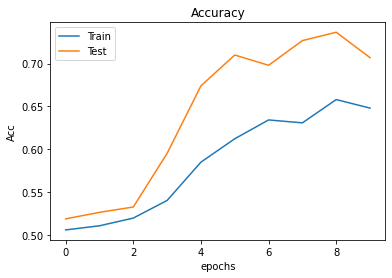

In [332]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

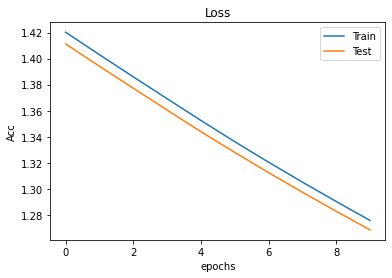

In [333]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

<a id ='8' ></a>
<h2 style = "background-image: linear-gradient(90deg, green, red);color:white;border:0"> Version 2 of the model with different hyperparameters </h2>

In [334]:
embedding_size=50
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=15000, output_dim=embedding_size, input_length=max_tokens))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.02)))

# ----- Compile model -----
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])
#model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=["accuracy"])

In [335]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 567, 50)           750000    
_________________________________________________________________
dropout_87 (Dropout)         (None, 567, 50)           0         
_________________________________________________________________
global_average_pooling1d_27  (None, 50)                0         
_________________________________________________________________
dense_92 (Dense)             (None, 16)                816       
_________________________________________________________________
dropout_88 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_93 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_89 (Dropout)         (None, 8)               

In [336]:
history=model.fit(x_train_pad,y_train,validation_split=0.3, epochs=10, batch_size=500, shuffle=True, verbose=1)

Epoch 1/10
56/56 [==============================] - 5s 77ms/step - loss: 1.4359 - accuracy: 0.5036 - val_loss: 1.4099 - val_accuracy: 0.6604
Epoch 2/10
56/56 [==============================] - 4s 73ms/step - loss: 1.4015 - accuracy: 0.5535 - val_loss: 1.3768 - val_accuracy: 0.6755
Epoch 3/10
56/56 [==============================] - 4s 73ms/step - loss: 1.3688 - accuracy: 0.5603 - val_loss: 1.3453 - val_accuracy: 0.6777
Epoch 4/10
56/56 [==============================] - 4s 72ms/step - loss: 1.3376 - accuracy: 0.5817 - val_loss: 1.3150 - val_accuracy: 0.6223
Epoch 5/10
56/56 [==============================] - 4s 72ms/step - loss: 1.3079 - accuracy: 0.5740 - val_loss: 1.2862 - val_accuracy: 0.6033
Epoch 6/10
56/56 [==============================] - 4s 72ms/step - loss: 1.2796 - accuracy: 0.5729 - val_loss: 1.2588 - val_accuracy: 0.6072
Epoch 7/10
56/56 [==============================] - 4s 72ms/step - loss: 1.2523 - accuracy: 0.5884 - val_loss: 1.2326 - val_accuracy: 0.6515
Epoch 8/10
56

In [337]:
result= model.evaluate(x_test_pad, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.1613 - accuracy: 0.7342


In [338]:
probabilities = model.predict(x_test_pad)
pred = np.argmax(probabilities, axis=1)

print(" ")
print("Results")

accuracy = accuracy_score(y_test, pred)

print('Accuracy: {:.4f}'.format(accuracy))
print(" ")
print(classification_report(y_test, pred))

 
Results
Accuracy: 0.7342
 
              precision    recall  f1-score   support

           0       0.68      0.86      0.76      4951
           1       0.82      0.61      0.70      5049

    accuracy                           0.73     10000
   macro avg       0.75      0.74      0.73     10000
weighted avg       0.75      0.73      0.73     10000



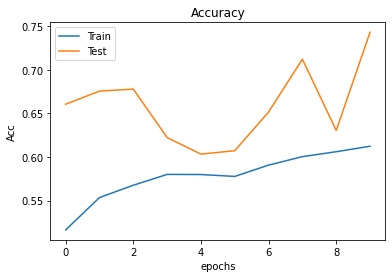

In [339]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

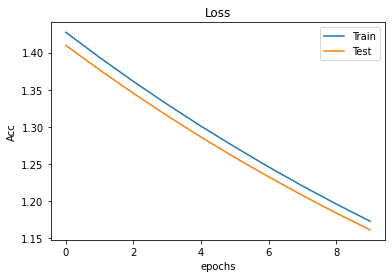

In [340]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()